In [1]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
#load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cats_dogs_frogs.h5' #'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

# Loading and resizing the images

In [36]:
#Load the path of the images
img_folder = 'img_test'
img_names = glob.glob(img_folder+'/*.jpg')
img_names = [img[len(img_folder)+1::] for img in img_names]

#Resizing them to (32x32px) and inverting them
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_folder+'/'+img_name), (32, 32)),
(1, 0, 2)).astype('float32')
for img_name in img_names]
imgs = np.array(imgs) / 255

# Doing predictions

In [39]:
# Train the model with the model (already compiled in a .h5 file)
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,
metrics=['accuracy'])
categories = ["Cat","Dog","Frog"]

# Predict
predictions = model.predict_classes(imgs)

# Showing results

In [ ]:
results = []
img_idx = 0
for pred in predictions:
    is_correct = 0 if img_names[img_idx].find(categories[pred].lower()) < 0 else 1
    results.append(is_correct)
    print("Image "+img_names[img_idx]+" categorized as a "+categories[pred]+". The prediction is "+("Correct" if is_correct == 1 else "Incorrect")+".")
    img_idx+=1

accuracy = sum(results)/len(predictions)
print("\nPredictions: ",predictions)
print("Results:     ", np.array(results))
print("Accuracy: ",accuracy)

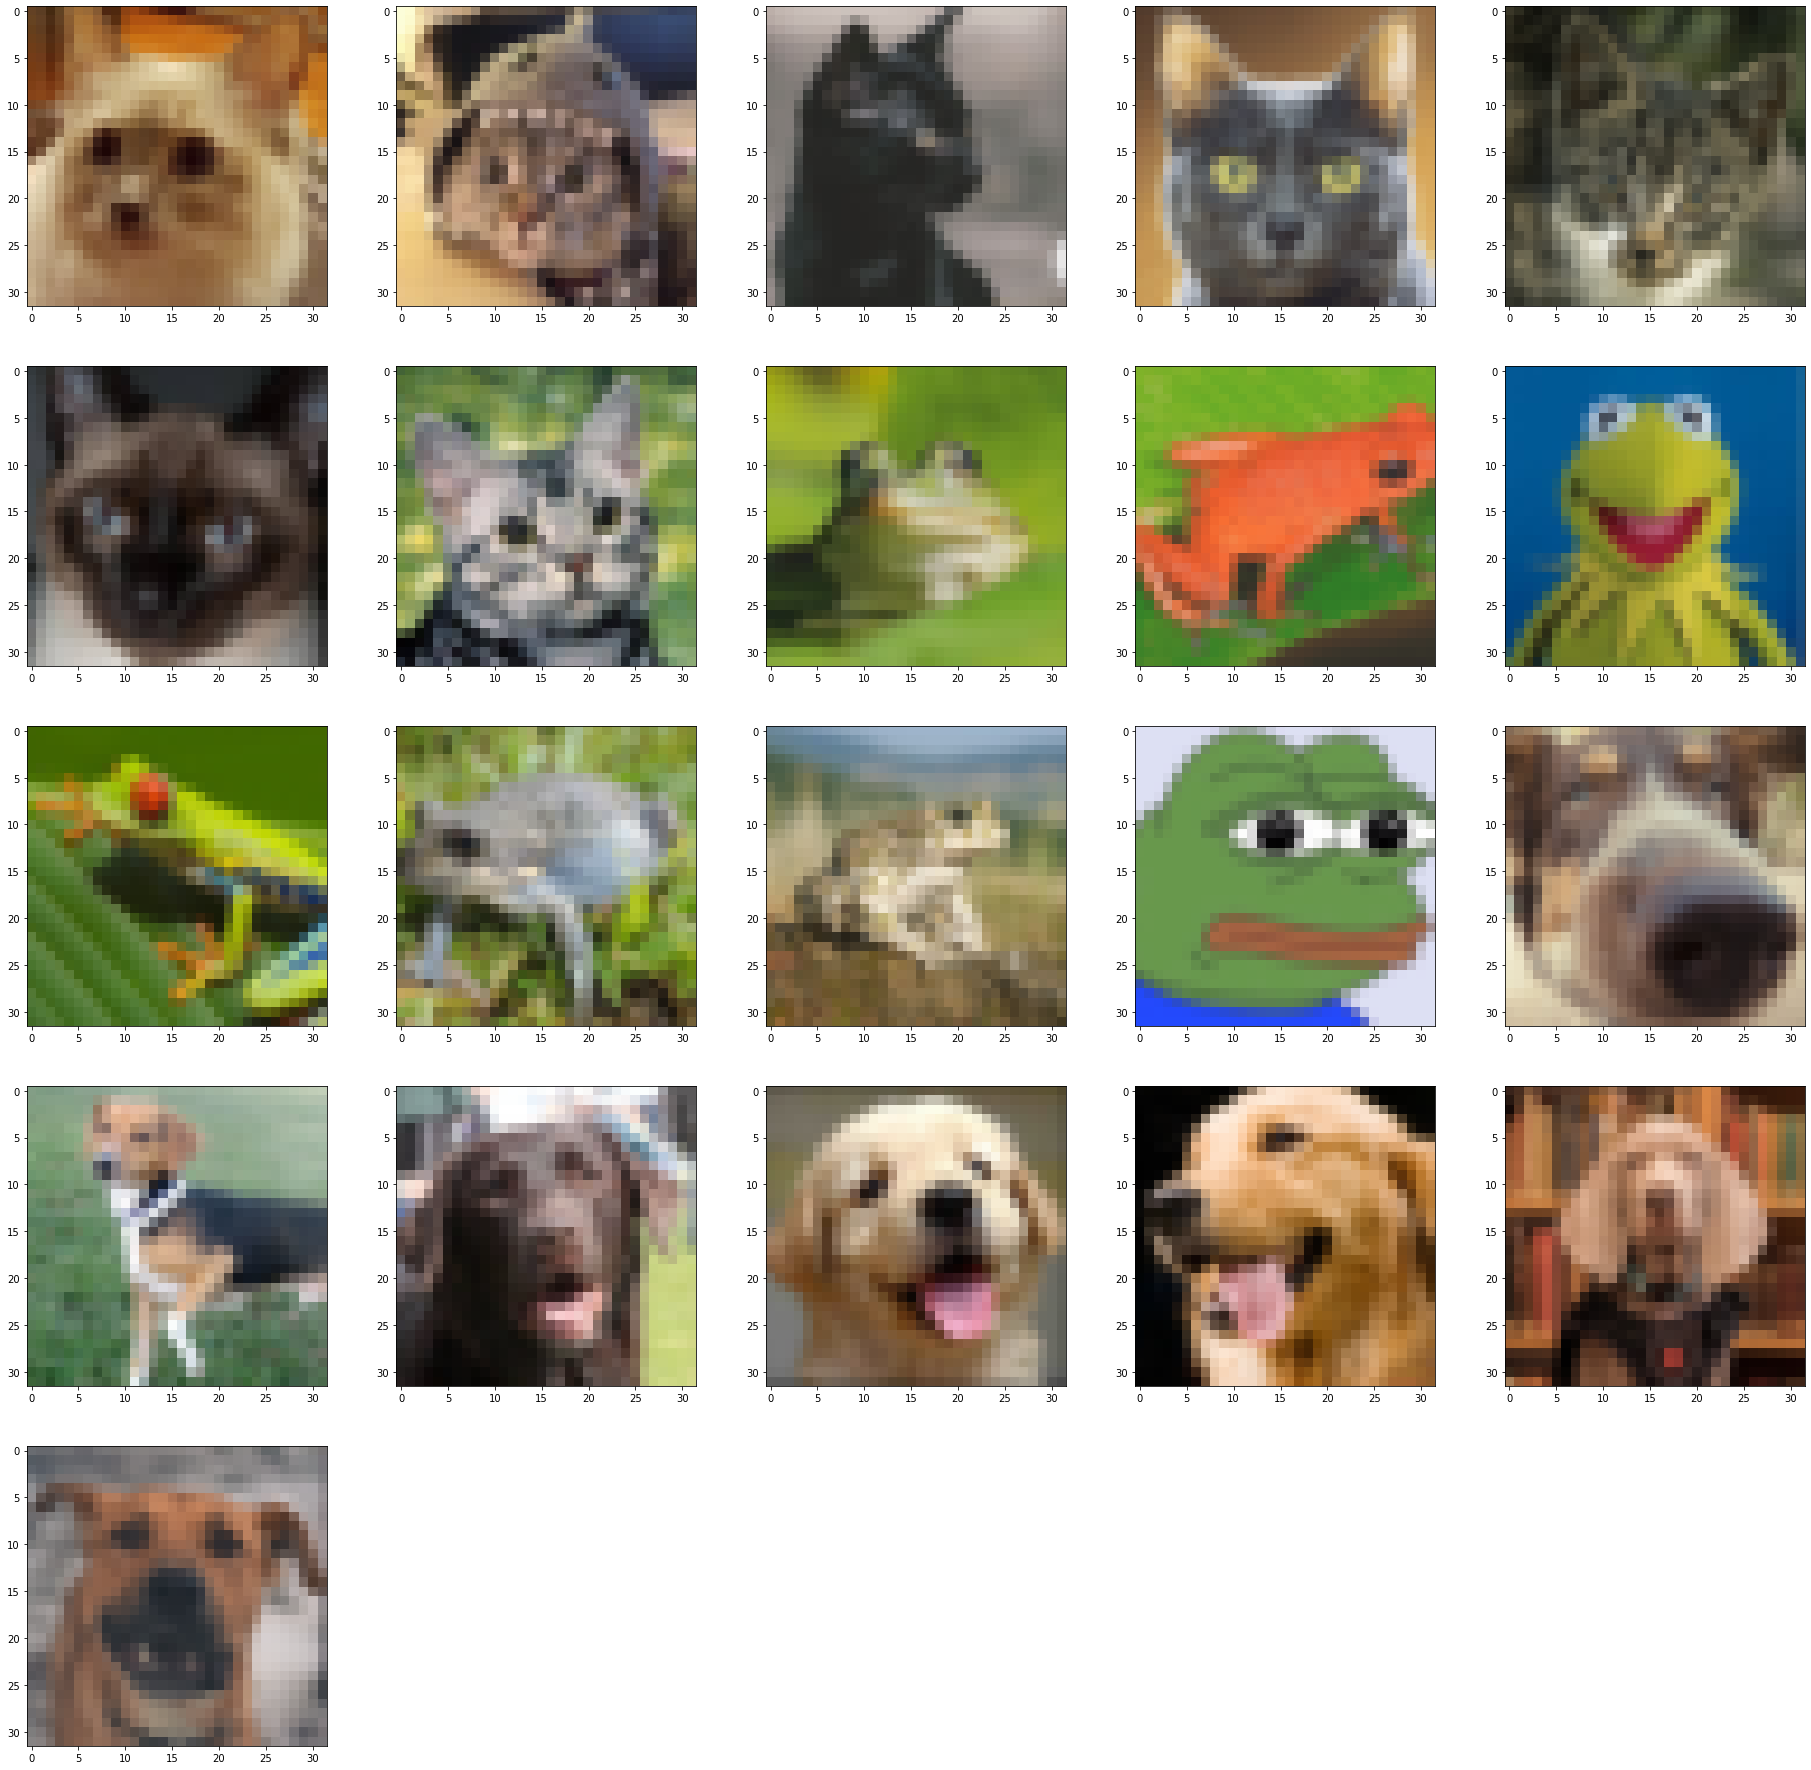

In [21]:
plt_images = [scipy.misc.imresize(scipy.misc.imread(img_folder+'/'+img_name), (32, 32)) for img_name in img_names]
fig = plt.figure(figsize=(32, 32))  # width, height in inches

for i in range(len(plt_images)):
    sub = fig.add_subplot(5, 5, i + 1)
    sub.imshow(plt_images[i], interpolation='nearest')